In [8]:
import sys
import numpy as np
import xarray as xr
import pandas as pd
import datetime as dt
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import matplotlib.cm as cm

import geocat.viz.util as gvutil

sys.path.append('/glade/work/ndietrich/Supplementary_Functions/')
import HelperFunctions as hp # Kinda janky way to add these functions, should make it a package but lazy

In [9]:
# t1 = dt.datetime(2013,1,76,0,1)
# t2 = dt.datetime(2013,1,76,1,0)
# timespan = pd.date_range(start=t1, end=t2, freq='H')

#Read in files
folderpath_tgcm = '/glade/scratch/bdilorenzo/GDC/tiegcm_files/'
folderpath_sat = '/glade/scratch/bdilorenzo/GDC/orbit_files/'

tgcm_filepath = folderpath_tgcm + '13Ma_sech_tie_2013-03-17T00-01-00_2013-03-17T01-00-00.nc'
sat1_filepath = folderpath_sat + 'gdc_drm_ephem_g1_allphases.ncdf'

tgcm_file = xr.open_dataset(tgcm_filepath)
sat1_file = xr.open_dataset(sat1_filepath)


In [10]:
# Time
time_epoch = sat1_file['time'].values.astype(int)
time = [dt.datetime.utcfromtimestamp(j) for j in time_epoch]

e_time = sat1_file['elapsed_time'].values

i_reg = np.where(e_time == 456)[0][0]
i_glo = np.where(e_time == 821)[0][0]

time_loc = time[0:i_reg]
time_reg = time[i_reg:i_glo]
time_glo = time[i_glo:]

t_h = np.array(dt.datetime(2013,3,17,1,0,0))
i_h1 = np.where(time_loc >= t_h)[0][0]

time_h = time_loc[0:i_h1]


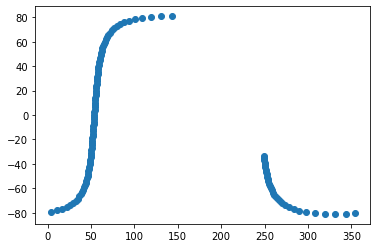

In [11]:
# Sat G1 orbit

Lat = sat1_file['geod_lat'].values
Lon = sat1_file['geod_lon'].values

lat_loc = Lat[0:i_reg]
lon_loc = Lon[0:i_reg]

lat = lat_loc[0:i_h1]
lon = lon_loc[0:i_h1]

plt.scatter(lon,lat)


In [12]:
# TIEGCM Files

temp_n = tgcm_file['TN'].values
Lat_T = tgcm_file['lat'].values
Lon_T = tgcm_file['lon'].values

## Altitude Plot

In [13]:
# # Controls
# expname = 'exp_1_testing/exp_1'

# # Time control
# tt1 = dt.datetime(2015,3,13,1,0)
# tt2 = dt.datetime(2015,3,13,6,0)
# timespan1 = pd.date_range(start=tt1, end=tt2, freq='H')
# # timespan2 = pd.date_range(start=tt2, end=tt2, freq='H')
# # timespan = pd.DatetimeIndex( np.hstack( (timespan1, timespan2 ) ) )
# t = timespan1[0] # Just look at first time. 

# # Reading in files using xarray
# folderpath_exp = "/glade/scratch/ndietrich/NOAA_OSSE/exp_OSSE_1/" + expname + "/ensmean/densitiesEns/"
# folderpath_true = "/glade/scratch/ndietrich/NOAA_OSSE/wamipe_truth/truthStates/"
# folderpath_control = "/glade/scratch/ndietrich/NOAA_OSSE/exp_OSSE_1/initial_ext/stateTimes/"

# expPost_filepath = folderpath_exp + "tiegcm_denPost.nc." + "{:03d}".format(t.dayofyear) + "{:03d}".format(t.hour)
# expPrior_filepath = folderpath_exp + "tiegcm_denPrior.nc." + "{:03d}".format(t.dayofyear) + "{:03d}".format(t.hour)
# true_filepath = folderpath_true + "wamgsm_truth.nc." + "{:03d}".format(t.dayofyear) + "{:03d}".format(t.hour)
# control_filepath = folderpath_control + "tiegcm_states.nc." + "{:03d}".format(t.dayofyear) + "{:03d}".format(t.hour)

# expPost_t = xr.open_dataset(expPost_filepath)
# expPrior_t = xr.open_dataset(expPrior_filepath)
# true_t = xr.open_dataset(true_filepath)
# control_t =xr.open_dataset(control_filepath)

# # Pulling out the dataa
# alts = true_t['alt'].values
# print(alts)

# var_true = true_t['NE']
# wrap_var_true = gvutil.xr_add_cyclic_longitudes(var_true, 'lon')

# var_expPost = expPost_t['NE_alts'].mean(dim="ens")
# var_expPrior = expPrior_t['NE_alts'].mean(dim="ens")
# wrap_var_prior = gvutil.xr_add_cyclic_longitudes(var_expPost,'lon')

# var_inc = (var_expPost - var_expPrior)
# wrap_var_inc = gvutil.xr_add_cyclic_longitudes(var_inc, "lon")

# innovPrior = (var_expPrior - var_true)
# wrap_var_innov = gvutil.xr_add_cyclic_longitudes(innovPrior, "lon")

# var_control = control_t['NE_alts'].mean(dim='ens')
# wrap_var_control = gvutil.xr_add_cyclic_longitudes(var_control, 'lon')


# # Plotting 
# ncols = 4
# nrows = 3
# fig_globe = plt.figure(figsize=(10,4), dpi=300)
# outer_grid = fig_globe.add_gridspec(nrows, ncols+2)
# outer_grid._col_width_ratios = [1,1,1,1,0.35,0.35]
# cax = np.empty((nrows,ncols),dtype=plt.Axes)
# for row in range(0,nrows):
#     for col in range(0,ncols):
#         cax[row][col] = fig_globe.add_subplot(outer_grid[row,col], projection=ccrs.Mercator(min_latitude=-80))
#         cax[row][col].set_extent([180,-180,-75,75], ccrs.PlateCarree())
#         cax[row][col].coastlines(linewidth=0.25)
# axcb1 = fig_globe.add_subplot(outer_grid[:,(ncols)],aspect=25) # colorbar
# axcb2 = fig_globe.add_subplot(outer_grid[:,ncols+1],aspect=25) # colorbar

# cmap1 = plt.get_cmap('turbo') # RdPu, Blues, PuBu, OrRd
# cmap2 = plt.get_cmap('coolwarm')

# # *May need to adjust
# colorbounds1 = np.linspace(0, 2.5e6, 11) # NE
# colorbounds2 = np.linspace(-1e6, 1e6, 11) # NE

# row = 0
# col = 0
# j = 0

# for a in range(0,alts.size):
#     truth_a = wrap_var_true.isel(alt=a)
#     prior_a = wrap_var_prior.isel(alt=a)
#     inc_a = wrap_var_inc.isel(alt=a)
#     control_a = wrap_var_control.isel(alt=a)
    
#     ax = cax[0][col]
#     varplot = truth_a.plot.contourf(ax=ax,
#                                     transform=ccrs.PlateCarree(),
#                                     levels=colorbounds1,
#                                     cmap=cmap1,
#                                     add_colorbar=False,
#                                     add_labels=False)

#         # ax.set_title(t.strftime('%B-%d - %HUT'),
#         #             pad=7)
#     ax.set_title(str(round(alts[a])) + ' km', pad=7)
    
#     if col == 0:
#         ax.text(-0.04, 0.50, 'WAM-IPE', va='bottom', ha='center',
#                 rotation='vertical', rotation_mode='anchor', weight='bold',
#                 fontsize=12,transform=ax.transAxes)

#     ax = cax[1][col]
#     varplot = prior_a.plot.contourf(ax=ax,
#                                     transform=ccrs.PlateCarree(),
#                                     levels=colorbounds1,
#                                     cmap=cmap1,
#                                     add_colorbar=False,
#                                     add_labels=False)
#     if col == 0:
#         ax.text(-0.04, 0.50, 'TIEGCM \n Posterior', va='bottom', ha='center',
#                 rotation='vertical', rotation_mode='anchor', weight='bold',
#                 fontsize=12,transform=ax.transAxes)

#     ax = cax[2][col]
#     varplot_inc = inc_a.plot.contourf(ax=ax,
#                                     transform=ccrs.PlateCarree(),
#                                     levels=colorbounds2,
#                                     cmap=cmap2,
#                                     add_colorbar=False,
#                                     add_labels=False)
#     if col == 0:
#         ax.text(-0.04, 0.50, 'Increment', va='bottom', ha='center',
#                 rotation='vertical', rotation_mode='anchor', weight='bold',
#                 fontsize=8,transform=ax.transAxes)

#     col += 1    

# cbar1 = plt.colorbar(varplot,
#                     cax=axcb1,
#                     pad=0.05,
#                    drawedges=True,
#                    label='Electron Density [#/cm$^3$]')

# cbar2 = plt.colorbar(varplot_inc,
#                     cax=axcb2,
#                     pad=0.05,
#                     drawedges=True,
#                     ticks=colorbounds2[0::2],
#                     label='Electron Density Inc [#/cm$^3$]')

# plt.show()
# # fig_globe.savefig('inc_NE_altitudes_exp1_post_3-13-01.png')